# Topic Modeling: Latent Dirichlet Allocation (LDA) 

Topic modeling is a type of statistical modeling for discovering the abstract “topics” that occur in a collection of documents, and Latent Dirichlet Allocation (LDA) is one of the method. LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

Main idea 
- Every documents is a mixture of topics. e.g. Document 1 is 90% topic A and 10% topic B, while Document 2 is 30% topic A and 70% topic B.

- Every topic is a mixture of words. e.g. two-topic model of American news, with one topic for “politics” and one for “entertainment.” The most common words in the politics topic might be “President”, “Congress”, and “government”, while the entertainment topic may be made up of words such as “movies”, “television”, and “actor”.

Three main parts of LDA

1. Dimensionality Reduction: Rather than representing a text T in its feature space as `{Word_i: count(Word_i, T) for Word_i in Vocabulary}`, you can represent it in a topic space as `{Topic_i: Weight(Topic_i, T) for Topic_i in Topics}`.
2. Unsupervised Learning: By doing topic modeling, we build clusters of words rather than clusters of texts. A text is thus a mixture of all the topics, each having a specific weight.
3. Tagging: abstract “topics” that occur in a collection of documents that best represents the information in them.

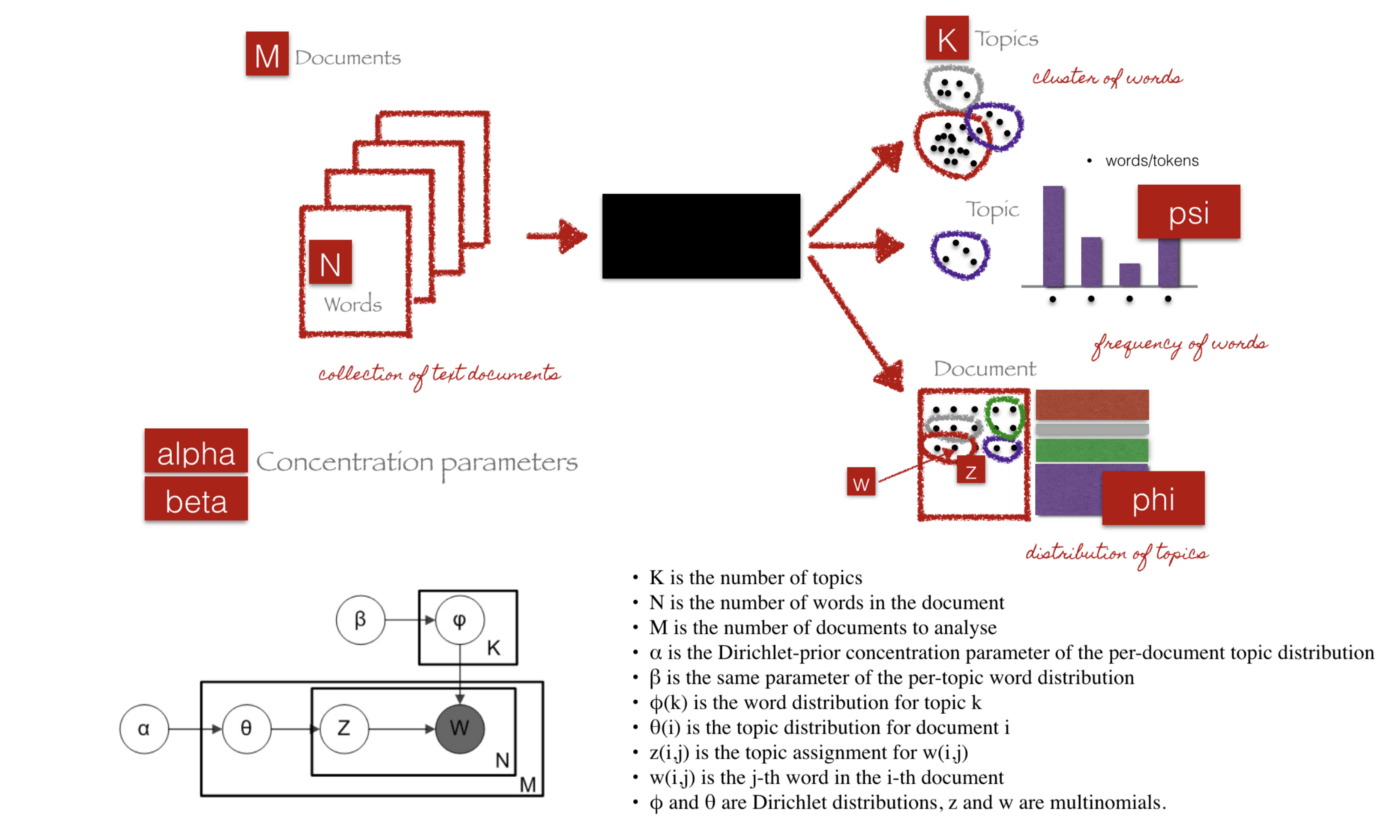

- psi, the distribution of words for each topic K
- phi, the distribution of topics for each document i
- $\alpha$: parameter is Dirichlet prior concentration parameter that represents document-topic density — with a higher alpha, documents are assumed to be made up of more topics and result in more specific topic distribution per document.
- $\beta$: is the same prior concentration parameter that represents topic-word density — with high beta, topics are assumed to made of up most of the words and result in a more specific word distribution per topic.

# Import data

In [6]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import random
random.seed(10)

In [7]:
df = pd.read_csv('processed_response.zip')

- what is lambda? 
- how to intperpret the result of the topics? 


## Running LDA using bags of words

In [8]:
import gensim
import gensim.corpora as corpora

In [9]:
from ast import literal_eval

#convert the response to a list 
df['clean_responses'] = df['clean_responses'].apply(literal_eval)

In [10]:
# Create Dictionary
id2word = corpora.Dictionary(df['clean_responses'])

# Create Corpus
texts = df['clean_responses']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]


In [11]:
from pprint import pprint
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=1)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())

[(0,
  '0.011*"x" + 0.011*"becaus" + 0.008*"valu" + 0.008*"p" + 0.007*"n" + '
  '0.007*"b" + 0.006*"time" + 0.006*"function" + 0.006*"one" + 0.005*"point"'),
 (1,
  '0.010*"one" + 0.008*"make" + 0.008*"think" + 0.007*"differ" + '
  '0.007*"becaus" + 0.006*"way" + 0.006*"understand" + 0.006*"exampl" + '
  '0.005*"peopl" + 0.005*"like"'),
 (2,
  '0.010*"system" + 0.009*"becaus" + 0.008*"peopl" + 0.006*"model" + '
  '0.006*"chang" + 0.006*"one" + 0.005*"exampl" + 0.005*"differ" + '
  '0.005*"think" + 0.004*"make"'),
 (3,
  '0.011*"differ" + 0.009*"data" + 0.008*"one" + 0.007*"variabl" + '
  '0.007*"make" + 0.006*"becaus" + 0.006*"activ" + 0.006*"like" + '
  '0.006*"market" + 0.005*"valu"'),
 (4,
  '0.006*"becaus" + 0.006*"peopl" + 0.005*"one" + 0.005*"countri" + '
  '0.005*"need" + 0.005*"compani" + 0.005*"time" + 0.004*"x" + 0.004*"like" + '
  '0.004*"exampl"')]


In [12]:
# Find the top 3 topics and its prob for a doc 
df['bow'] = df['clean_responses'].map(id2word.doc2bow)
df['topic'] = df['bow'].map(lda_model.get_document_topics)
df['top1'] = df['topic'].apply(lambda x: x[0][0])
df['prob1'] = df['topic'].apply(lambda x: x[0][1])
df['top2'] = df['topic'].apply(lambda x: x[1][0] if len(x) > 1 else np.nan)
df['prob2'] = df['topic'].apply(lambda x: x[1][1] if len(x) > 1 else np.nan)
df['top3'] = df['topic'].apply(lambda x: x[2][0] if len(x) > 2 else np.nan)
df['prob3'] = df['topic'].apply(lambda x: x[2][1] if len(x) > 2 else np.nan)
df.drop(['bow', 'topic'], axis=1, inplace = True)

In [13]:
# Topic start from value 1 instead of 0
df['top1'] = df['top1'].apply(lambda x: x+1)
df['top2'] = df['top2'].apply(lambda x: x+1)
df['top3'] = df['top3'].apply(lambda x: x+1)

In [14]:
df.head()

,Polls ID,Assessment reports Student ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score,time_stamp,tokenized_responses,stemmed_responses,clean_responses,string,LOs/ HCs,College,Course,top1,prob1,top2,prob2,top3,prob3
0,12522.0,41.0,The strengths of Plato's approach is his const...,#objectivemorality,2.0,1,"['The', 'strengths', 'of', ""Plato's"", 'approac...","['the', 'strength', 'of', 'plato', 'approach',...","[strength, plato, approach, construct, whole, ...",strength plato approach construct whole framew...,objmorality,AH,AH111,2,0.647318,3.0,0.328039,NaN,NaN
1,12522.0,335.0,In the breakout we discussed if outside the ca...,#objectivemorality,3.0,1,"['In', 'the', 'breakout', 'we', 'discussed', '...","['in', 'the', 'breakout', 'we', 'discuss', 'if...","[breakout, discuss, outsid, cave, bigger, cave...",breakout discuss outsid cave bigger cave thus ...,objmorality,AH,AH111,1,0.022171,2.0,0.774988,5.0,0.186991
2,12522.0,318.0,Back to cmmon confusion time: the section 'und...,#objectivemorality,2.0,1,"['Back', 'to', 'cmmon', 'confusion', 'time', '...","['back', 'to', 'cmmon', 'confus', 'time', 'the...","[back, cmmon, confus, time, section, understan...",back cmmon confus time section understand inte...,objmorality,AH,AH111,2,0.874219,3.0,0.100925,NaN,NaN
3,12522.0,315.0,Most difficult weakness is that his position w...,#objectivemorality,2.0,1,"['Most', 'difficult', 'weakness', 'is', 'that'...","['most', 'difficult', 'weak', 'is', 'that', 'h...","[difficult, weak, posit, understand, testabl, ...",difficult weak posit understand testabl like i...,objmorality,AH,AH111,1,0.011370,2.0,0.954225,3.0,0.011471
4,12522.0,297.0,I'm still trying to understand the significanc...,#objectivemorality,2.0,1,"[""I'm"", 'still', 'trying', 'to', 'understand',...","[""i'm"", 'still', 'tri', 'to', 'understand', 't...","[i'm, still, tri, understand, signific, cave, ...",i'm still tri understand signific cave analog ...,objmorality,AH,AH111,2,0.962804,NaN,NaN,NaN,NaN


In [4]:
# Normalize the score distribution per cluster 
norm_df = df["Assessment reports Score"].groupby(df["top1"]).value_counts().rename('count').reset_index()
norm_df = norm_df.assign(weight=norm_df['count']/norm_df.groupby('top1')['count'].transform('sum'))

sns.barplot(x="Assessment reports Score", y="weight", hue = 'top1', data=norm_df)
plt.title('Normalized Assessment Score Count by Topic')

NameError: name 'df' is not defined

## Average grade per topic

In [110]:
df.groupby('top1').mean()

,Polls ID,Assessment reports Student ID,Assessment reports Score,time_stamp,prob1,top2,prob2,top3,prob3
top1,,,,,,,,,
1,165800.691390,1645.864973,3.144761,7177.419524,0.516864,2.837115,0.369475,3.576662,0.234987
2,165645.332215,2115.369436,3.231404,7193.605813,0.679204,3.642812,0.386863,4.676976,0.294914
3,167052.623614,1893.186801,3.263595,7323.181713,0.574134,4.563157,0.480920,5.000000,0.362829
4,175601.629414,1445.330377,3.239621,7760.531150,0.716671,5.000000,0.483208,NaN,NaN
5,159760.326552,1150.902618,3.272401,6756.883321,0.980400,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='top1', ylabel='Assessment reports Score'>

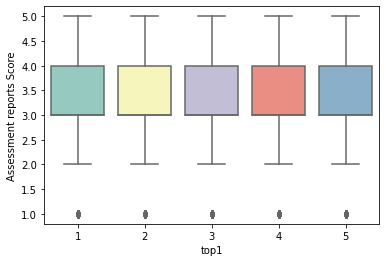

In [108]:
sns.boxplot(y= 'Assessment reports Score', x = 'top1', data = df, palette="Set3")

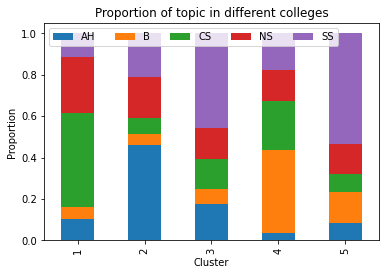

In [86]:
# College distribution per cluster
cross_tab_prop = pd.crosstab(index=df['top1'],
                             columns=df['College'],
                             normalize="index")
cross_tab_prop


cross_tab_prop.plot(kind='bar', 
                    stacked=True)

plt.legend(loc="upper left", ncol = 5)
plt.xlabel("Cluster")
plt.ylabel("Proportion")
plt.title("Proportion of topic in different colleges")
plt.show()


## One Hot encoding for topics 

In [87]:
from sklearn.preprocessing import OneHotEncoder

top1 = df['top1']
ohe = OneHotEncoder()
top1 = np.array(top1).reshape(-1, 1)

top1 = pd.DataFrame(ohe.fit_transform(top1).toarray(), columns= ['1', '2', '3', '4', '5'], index=df.index)


In [88]:
college = df['College']
ohe = OneHotEncoder()
college = np.array(college).reshape(-1, 1)

college = pd.DataFrame(ohe.fit_transform(college).toarray(), columns= ['AH', 'BS', 'CS', 'NS', 'SS'], index=df.index)

In [89]:
top1_df = pd.concat([df,top1, college], axis = 1)

In [90]:
top1_df = top1_df[['time_stamp', '1', '2', '3', '4', '5', 'Assessment reports Score', 'AH', 'BS', 'CS', 'NS', 'SS']]


In [91]:
top1_df

,time_stamp,1,2,3,4,5,Assessment reports Score,AH,BS,CS,NS,SS
0,1,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
1,1,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0
2,1,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
3,1,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
4,1,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
181936,15312,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0
181937,15312,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0
181938,15312,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0
181939,15312,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0


In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = top1_df[['1', '2', '3', '4', '5', 'time_stamp', 'AH', 'BS', 'CS', 'NS', 'SS']]
# x = x.reshape(-1,1)
y = top1_df['Assessment reports Score']

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=123)


lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [93]:
coeff_parameter = pd.DataFrame(lr.coef_, x.columns, columns=['Coefficient'])
coeff_parameter.loc['intercept', :] = lr.intercept_
coeff_parameter

,Coefficient
1,-0.093435
2,0.008146
3,0.037150
4,-0.005869
5,0.054007
time_stamp,0.000010
AH,0.003999
BS,0.022322
CS,0.046208
NS,-0.072033


(array([  497.,     0.,  5046.,   524., 14167.,  9313.,  1063., 14744.,
            0.,   132.]),
 array([-2.38824378, -1.9499051 , -1.51156642, -1.07322773, -0.63488905,
        -0.19655037,  0.24178832,  0.680127  ,  1.11846568,  1.55680436,
         1.99514305]),
 <BarContainer object of 10 artists>)

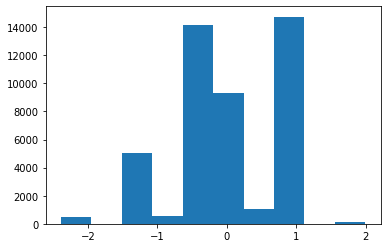

In [94]:
y_pred = lr.predict(x_test)
plt.hist(y_test - y_pred)


Residuals are normally distributed. 

## Test performance of the model 

In [95]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print(f'Mean squared error: {round(mean_squared_error(y_test, y_pred),2)}')
# R-squared: 
print(f'R-squared: {round(r2_score(y_test, y_pred), 4)}, meaning that around {round(r2_score(y_test, y_pred)*100,2)}% of the variance in data can be explained by our model.')

Mean squared error: 0.48
R-squared: 0.0097, meaning that around 0.97% of the variance in data can be explained by our model.


From the Topic 0 is a represented as 0.013*"would" + 0.011*"becaus" + 0.009*"one" + 0.007*"use" + 0.007*"make" + 0.006*"like" + 0.006*"chang" + 0.006*"differ" + 0.005*"data" + 0.005*"increas."
It means the top 10 keywords that contribute to this topic are: would, becaus, one.. and so on and the weight of would on topic 0 is 0.013.

In [96]:
#print the top 20 words in each topics 
topics_matrix = lda_model.show_topics(formatted=False, num_words=20)
topics_matrix = np.array(topics_matrix)
topic_words = topics_matrix[:,1]

for i in topic_words:
    print([str(word[0]) for word in i])
    print()

['x', 'becaus', 'valu', 'p', 'n', 'b', 'time', 'function', 'one', 'point', 'mean', 'distribut', 'problem', 'c', 'data', 'chang', 'first', 'number', 'differ', 'find']

['one', 'make', 'think', 'differ', 'becaus', 'way', 'understand', 'exampl', 'peopl', 'like', 'activ', 'need', 'problem', 'help', 'work', 'us', 'import', 'process', 'first', 'specif']

['system', 'becaus', 'peopl', 'chang', 'model', 'one', 'exampl', 'differ', 'think', 'work', 'make', 'like', 'social', 'state', 'help', 'individu', 'group', 'case', 'creat', 'import']

['differ', 'data', 'one', 'variabl', 'make', 'becaus', 'activ', 'market', 'like', 'valu', 'compani', 'product', 'effect', 'may', 'custom', 'peopl', 'case', 'exampl', 'model', 'us']

['becaus', 'peopl', 'one', 'countri', 'need', 'time', 'compani', 'x', 'like', 'exampl', 'effect', 'make', 'think', 'chang', 'take', 'govern', 'risk', 'differ', 'way', 'increas']



/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_37422/4262890021.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  topics_matrix = np.array(topics_matrix)


In [97]:
#visualize the result 

import pyLDAvis
# import pyLDAvis.gensim
import pyLDAvis.gensim_models as gensimvis
import os
import pickle 

# Visualize the topics
pyLDAvis.enable_notebook()

In [98]:
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word, sort_topics = False)

/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reloa

In [99]:
pyLDAvis.display(LDAvis_prepared)

The relevance metric: $\lambda$

- $\lambda$ = 1: ranking soley by probability is decending order 
- $\lambda$ = 0: ranking soley by the lift. lift = the ratio of a term’s probability within a topic to its marginal probability across the corpus. It generally decreases with globally frequent terms. But it can be noisy too if the rare terms only occur in one single topic.

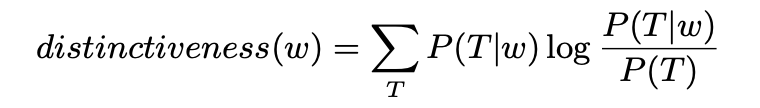

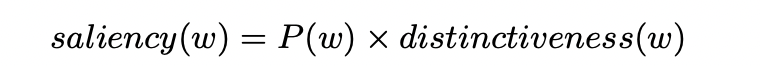

$P(T|w)$: the likelihood that observed word $w$ was generated by latent topic $T$. We use it to determine how informative a specific word $w$ can inform the topics. If word tells little of the topic mixture it will receive a low distinctiveness score. 


In [100]:
pyLDAvis.save_html(LDAvis_prepared, '5_lda.html')

## Running LDA using tf-idf 

In [13]:
from gensim import corpora, models

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Build LDA model on tf-idf
lda_model_tf = gensim.models.LdaMulticore(corpus=corpus_tfidf,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model_tf.print_topics())

[(0,
  '0.004*"system" + 0.004*"peopl" + 0.003*"differ" + 0.003*"level" + '
  '0.003*"one" + 0.003*"emot" + 0.003*"would" + 0.003*"think" + '
  '0.003*"understand" + 0.003*"interact"'),
 (1,
  '0.009*"problem" + 0.005*"solut" + 0.004*"solv" + 0.004*"use" + '
  '0.003*"think" + 0.003*"constraint" + 0.003*"would" + 0.003*"differ" + '
  '0.003*"goal" + 0.003*"help"'),
 (2,
  '0.009*"x" + 0.006*"data" + 0.006*"variabl" + 0.006*"distribut" + '
  '0.006*"sampl" + 0.005*"probabl" + 0.005*"valu" + 0.005*"model" + 0.004*"p" '
  '+ 0.004*"would"'),
 (3,
  '0.003*"would" + 0.003*"compani" + 0.003*"peopl" + 0.003*"market" + '
  '0.003*"differ" + 0.003*"think" + 0.002*"make" + 0.002*"one" + 0.002*"use" + '
  '0.002*"need"'),
 (4,
  '0.009*"poll" + 0.009*"student" + 0.008*"complet" + 0.008*"https" + '
  '0.007*"present" + 0.007*"com" + 0.007*"googl" + 0.007*"doc" + 0.006*"edit" '
  '+ 0.006*"document"'),
 (5,
  '0.007*"n" + 0.004*"would" + 0.004*"node" + 0.004*"algorithm" + 0.003*"tree" '
  '+ 0.003

In [75]:
#print the top 20 words in each topics 
topics_matrix = lda_model_tf.show_topics(formatted=False, num_words=20)
topics_matrix = np.array(topics_matrix)
topic_words = topics_matrix[:,1]

for i in topic_words:
    print([str(word[0]) for word in i])
    print()

NameError: name 'lda_model_tf' is not defined

In [15]:
LDAvis_prepared_tf = gensimvis.prepare(lda_model_tf, corpus_tfidf, id2word, sort_topics = False)

/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/joblib/backports.py:36: De

In [16]:
pyLDAvis.display(LDAvis_prepared_tf)

In [17]:
pyLDAvis.save_html(LDAvis_prepared_tf, 'lda_tf.html')

# Select the best number of clusters by coherence score

We can coherence score in topic modeling to measure how interpretable the topics are to humans. We select the best number of clusters based on highest coherence score. 

In [25]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score bag of words: ', coherence_lda)

coherence_model_lda = CoherenceModel(model=lda_model_tf, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda_tf = coherence_model_lda.get_coherence()
print('Coherence Score tf-idf: ', coherence_lda_tf)

Coherence Score bag of words:  0.33813657622075743
Coherence Score tf-idf:  0.3884673157891732


In [27]:
num_list = list(range(2,11))
coherence = {}
for num_topics in num_list: 
    lda_model_tf = gensim.models.LdaMulticore(corpus=corpus_tfidf,
                                       id2word=id2word,
                                       num_topics=num_topics)
    coherence_model_lda = CoherenceModel(model=lda_model_tf, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence[num_topics] = coherence_lda

In [28]:
coherence

{2: 0.29721896496192934,
 3: 0.31396921106978004,
 4: 0.34535485103863095,
 5: 0.2559763428291707,
 6: 0.3195102597091959,
 7: 0.3465651203928427,
 8: 0.3767523695290471,
 9: 0.3953096197373716,
 10: 0.38321805318943086}

The next can be tuning the hyperparameters for alpha and beta. 
- [Evaluate Topic Models: Latent Dirichlet Allocation (LDA)]([https://](https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0))



In [29]:
n = 9

# Build LDA model on tf-idf
lda_model_tf = gensim.models.LdaMulticore(corpus=corpus_tfidf,
                                       id2word=id2word,
                                       num_topics= n)
# Print the Keyword in the 10 topics
pprint(lda_model_tf.print_topics())

[(0,
  '0.004*"data" + 0.004*"use" + 0.004*"studi" + 0.003*"would" + 0.003*"think" '
  '+ 0.003*"make" + 0.003*"one" + 0.003*"differ" + 0.003*"bias" + '
  '0.003*"audienc"'),
 (1,
  '0.004*"art" + 0.003*"music" + 0.003*"moral" + 0.002*"use" + 0.002*"cultur" '
  '+ 0.002*"would" + 0.002*"peopl" + 0.002*"think" + 0.002*"differ" + '
  '0.002*"one"'),
 (2,
  '0.004*"variabl" + 0.004*"attent" + 0.004*"memori" + 0.004*"line" + '
  '0.004*"data" + 0.003*"slope" + 0.003*"regress" + 0.003*"would" + '
  '0.003*"process" + 0.003*"correl"'),
 (3,
  '0.006*"system" + 0.005*"problem" + 0.004*"model" + 0.003*"level" + '
  '0.003*"differ" + 0.003*"agent" + 0.003*"use" + 0.003*"interact" + '
  '0.003*"complex" + 0.003*"solut"'),
 (4,
  '0.013*"x" + 0.009*"n" + 0.007*"p" + 0.005*"b" + 0.005*"valu" + '
  '0.005*"function" + 0.005*"number" + 0.004*"tree" + 0.004*"f" + '
  '0.004*"probabl"'),
 (5,
  '0.006*"student" + 0.005*"poll" + 0.004*"complet" + 0.004*"present" + '
  '0.003*"peopl" + 0.003*"would" + 0

In [30]:
#print the top 20 words in each topics 
topics_matrix = lda_model_tf.show_topics(formatted=False, num_words=20)
topics_matrix = np.array(topics_matrix)
topic_words = topics_matrix[:,1]

for i in topic_words:
    print([str(word[0]) for word in i])
    print()

['data', 'use', 'studi', 'would', 'think', 'make', 'one', 'differ', 'bias', 'audienc', 'hypothesi', 'research', 'could', 'understand', 'googl', 'design', 'variabl', 'effect', 'becaus', 'test']

['art', 'music', 'moral', 'use', 'cultur', 'would', 'peopl', 'think', 'differ', 'one', 'becaus', 'also', 'way', 'like', 'work', 'make', 'artist', 'understand', 'context', 'could']

['variabl', 'attent', 'memori', 'line', 'data', 'slope', 'regress', 'would', 'process', 'correl', 'use', 'brain', 'r', 'model', 'temperatur', 'co', 'increas', 'one', 'becaus', 'differ']

['system', 'problem', 'model', 'level', 'differ', 'agent', 'use', 'interact', 'complex', 'solut', 'would', 'one', 'emerg', 'solv', 'properti', 'becaus', 'understand', 'think', 'could', 'state']

['x', 'n', 'p', 'b', 'valu', 'function', 'number', 'tree', 'f', 'probabl', 'distribut', 'algorithm', 'vector', 'c', 'node', 'would', 'matrix', 'z', 'use', 'time']

['student', 'poll', 'complet', 'present', 'peopl', 'would', 'countri', 'differ'

/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_13803/697313039.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  topics_matrix = np.array(topics_matrix)


In [31]:
LDAvis_prepared_tf = gensimvis.prepare(lda_model_tf, corpus_tfidf, id2word)

/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reloa

In [32]:
pyLDAvis.display(LDAvis_prepared_tf)
pyLDAvis.save_html(LDAvis_prepared_tf, '9_lda_tf.html')